# Mask_RCNN official library - https://github.com/matterport/Mask_RCNN

# Faster_RCNN detectron2 - https://github.com/facebookresearch/detectron2

# Coco Dataset - https://cocodataset.org/
----------------------------------------------------------------------------------------------------------------

# Step #1 - Extract Person Mask
------------------------------------------------

### Import Libraries


In [1]:
import sys
import random
import math
import os
import cv2
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(os.path.join(ROOT_DIR, "codes/utills/coco/"))  # To find local version
import coco
from pycocotools.coco import COCO

Using TensorFlow backend.


### Configuration

In [2]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [3]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
# config.display()

### Model with pretrained weights

In [4]:
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "models/pretrained/matterport_mask_rcnn/mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

model = modellib.MaskRCNN(mode="inference", config=config, model_dir=ROOT_DIR)
# Load weights trained on MS-COCO
from keras.engine import saving
model.load_weights(COCO_MODEL_PATH, by_name=True)
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


### Loading an image

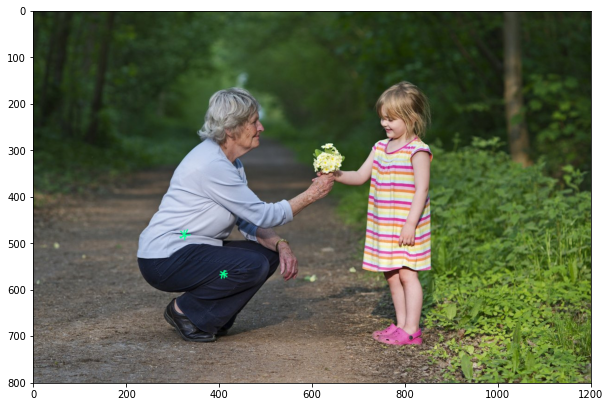

In [33]:
# Load a random image from the images folder
IMAGE_DIR = ROOT_DIR + "/data/random_images/mark_added/"
file_name = random.choice(os.listdir(IMAGE_DIR))
file_name = "random.jpg"
image = skimage.io.imread(os.path.join(IMAGE_DIR, file_name))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(image)

### Prediction

Processing 1 images
image                    shape: (801, 1201, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1201.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


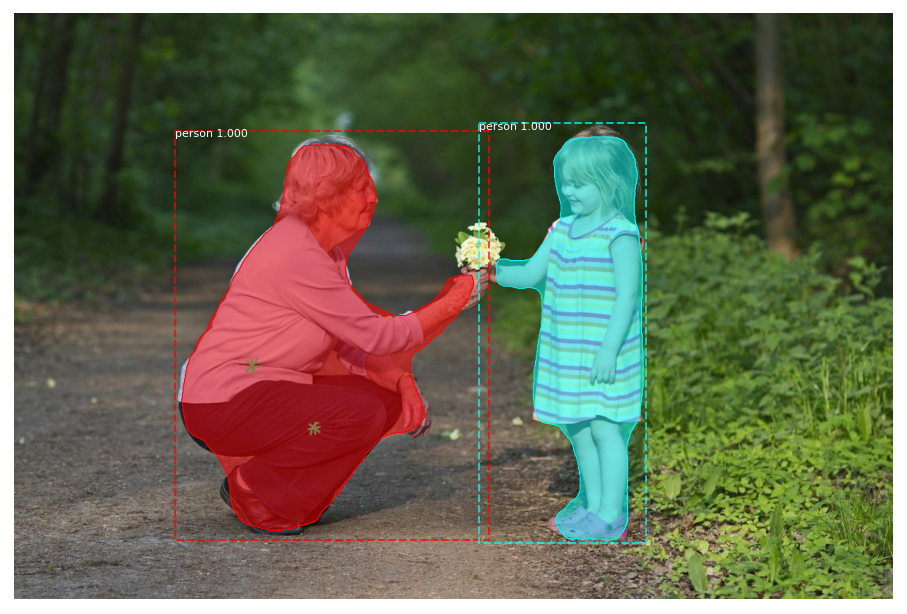

Total detected objects - 2
Total unique objects - 1
--------------------------------
person - 2


In [34]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
from collections import Counter
print(f'Total detected objects - {len(r["class_ids"])}')
print(f'Total unique objects - {len(np.unique(r["class_ids"]))}')
print("--------------------------------")
bla = [print(f'{class_names[id]} - {num}') for id,num in Counter(r['class_ids']).items()]

### Showing Masks

/home/farhat/Farhat_files/Envs/mark_c3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/farhat/Farhat_files/Envs/mark_c3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: /media/farhat/Research/GitHub/Mark-NET/outputs/mask/new//1_BG.jpg is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
/home/farhat/Farhat_files/Envs/mark_c3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: /media/farhat/Research/GitHub/Mark-NET/outputs/mask/new//2_person.jpg is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


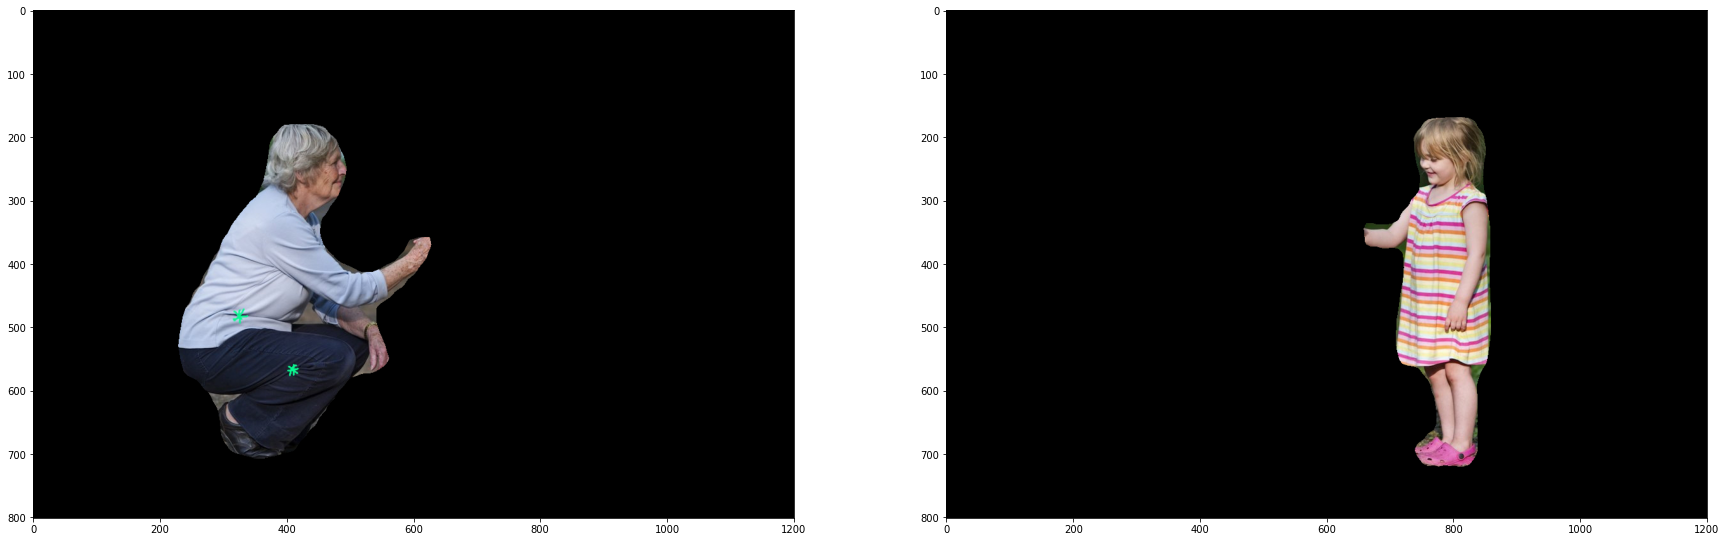

In [35]:
import matplotlib.pyplot as plt
ids = np.where(r['class_ids']==class_names.index("person"))[0]

import shutil
from datetime import datetime
out_dir = os.path.join(ROOT_DIR, "outputs/mask/new/")
if not os.path.exists(out_dir): os.makedirs(out_dir)
else: 
    shutil.rmtree(out_dir)
    os.makedirs(out_dir)

plt.figure(figsize=(30,30))
columns = 2
person_mask = []
for i, id in enumerate(ids):
    mask = r['masks'][:, :, id] * 1
    mask =np.moveaxis(np.stack([mask, mask, mask]), 0, 2)
    masked_image = image * mask
    person_mask.append(np.array(masked_image))
    plt.subplot(len(ids) / columns + 1, columns, i + 1)
    plt.imshow(masked_image)
    skimage.io.imsave(f'{out_dir}/{i+1}_{class_names[id]}.jpg', masked_image)

# Step #2 - Detect Marks

In [9]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import MetadataCatalog

In [10]:
OUTPUT_DIR = "/media/farhat/Research/GitHub/Mark-NET/outputs/detectron2/"
filename = OUTPUT_DIR + "2020-10-03 23_31 afterAll_15k_iters/config.pkl"

import pickle
with open(filename, 'rb') as f:
     cfg = pickle.load(f)

# --- Evaluation Setup
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85

predictor = DefaultPredictor(cfg)

/home/farhat/Farhat_files/Envs/mark_c3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


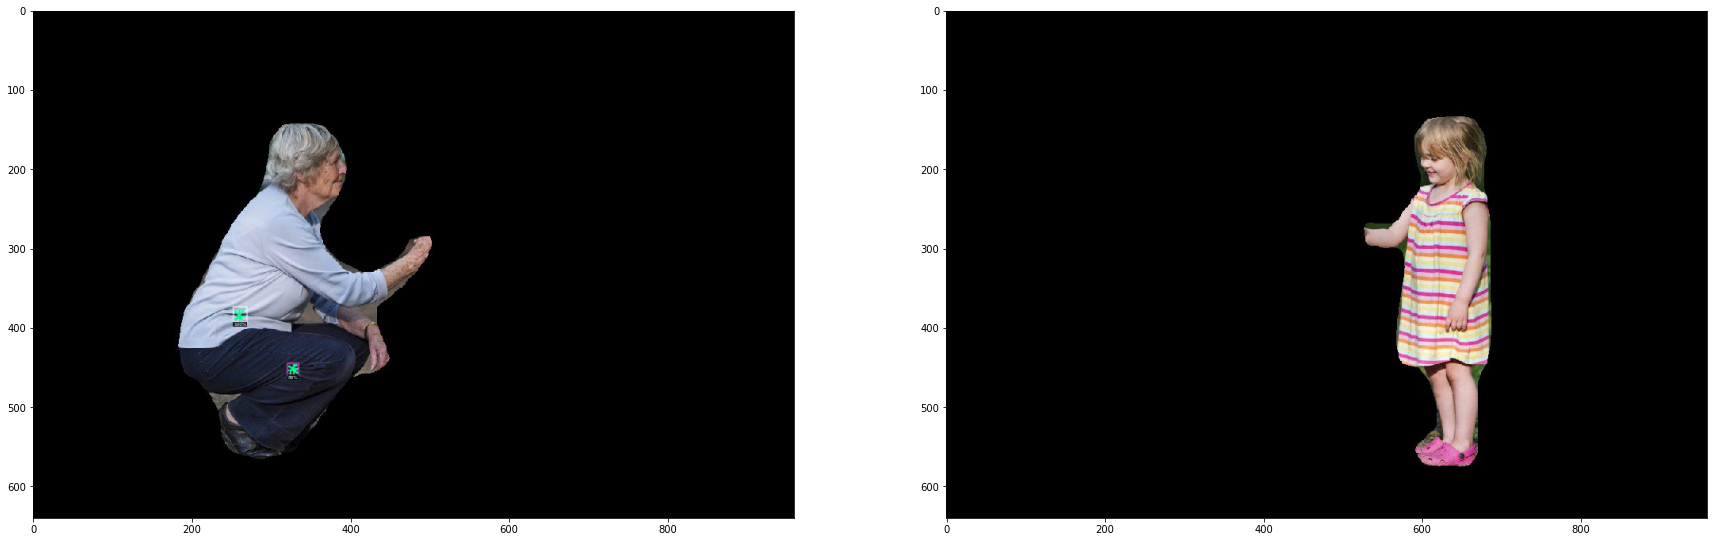

In [36]:
imgs = [skimage.io.imread(out_dir + path) for path in os.listdir(out_dir) if ".jpg" in path]
names = [path for path in os.listdir(out_dir) if ".jpg" in path]

import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
columns = 2
if not os.path.exists(out_dir + '/marks'): os.makedirs(out_dir + '/marks')
else: 
    shutil.rmtree(out_dir + '/marks')
    os.makedirs(out_dir + '/marks')

for i, img in enumerate(imgs):
    outputs = predictor(img)
    v = Visualizer(img[:, :, ::-1], 
       MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), 
       scale=0.8, 
       instance_mode=ColorMode.IMAGE_BW)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    img = v.get_image()[:, :, ::-1]
    plt.subplot(len(ids) / columns + 1, columns, i + 1)
    plt.imshow(img)
    skimage.io.imsave(f'{out_dir}/marks/{names[i]}', img)